#### Initial Setup

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv(r"C:\Users\GANES\OneDrive\Desktop\ML\MINI PROJECTS\FITNESS CLUB CLASSIFICATION\data\fitness_class_2212.csv")
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


Data Preprocessing

Check Column Descriptions and Missing Values

In [4]:
# Check for missing values
df.isnull().sum()

# Check unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

booking_id: [   1    2    3 ... 1498 1499 1500]
months_as_member: [ 17  10  16   5  15   7  11   9  23  13   8  22   6  33  24  14   2  12
  26  28  27   1   3  21  18  19  53  20  34  25  32  73  55   4  35  54
  76  62  42 105  90  29  60  30 107  52  37  38  48  51  40  89  57  36
  44  39  41  47  58  66  45  43  61  50  65  31  97  59  93 148 111  69]
weight: [79.56 79.01 74.53 ... 87.38 68.64 94.39]
days_before: ['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 days' '20' '1'
 '15' '6 days' '11' '13 days' '3 days' '16' '1 days' '7 days' '8 days'
 '10 days' '14 days' '17' '5 days' '2 days' '4 days' '29']
day_of_week: ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']
time: ['PM' 'AM']
category: ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']
attended: [0 1]


Handle Missing Values and Data Corrections

In [5]:
# Replace missing weight values with the mean
df['weight'] = df['weight'].fillna(df['weight'].mean())

# Convert 'days_before' to integer by removing 'days' suffix
df['days_before'] = df['days_before'].str.replace(' days', '').astype(int)

# Standardize 'day_of_week' to 3-letter abbreviations and map to numeric values
df['day_of_week'] = df['day_of_week'].str[:3]
day_mapping = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
df['day_of_week'] = df['day_of_week'].map(day_mapping)

# Replace '-' in 'category' with 'unknown'
df['category'] = df['category'].replace('-', 'unknown')

Check for Duplicates

In [6]:
df.duplicated().sum()

0

Exploratory Data Analysis (EDA)

Visualize Attendance by Category

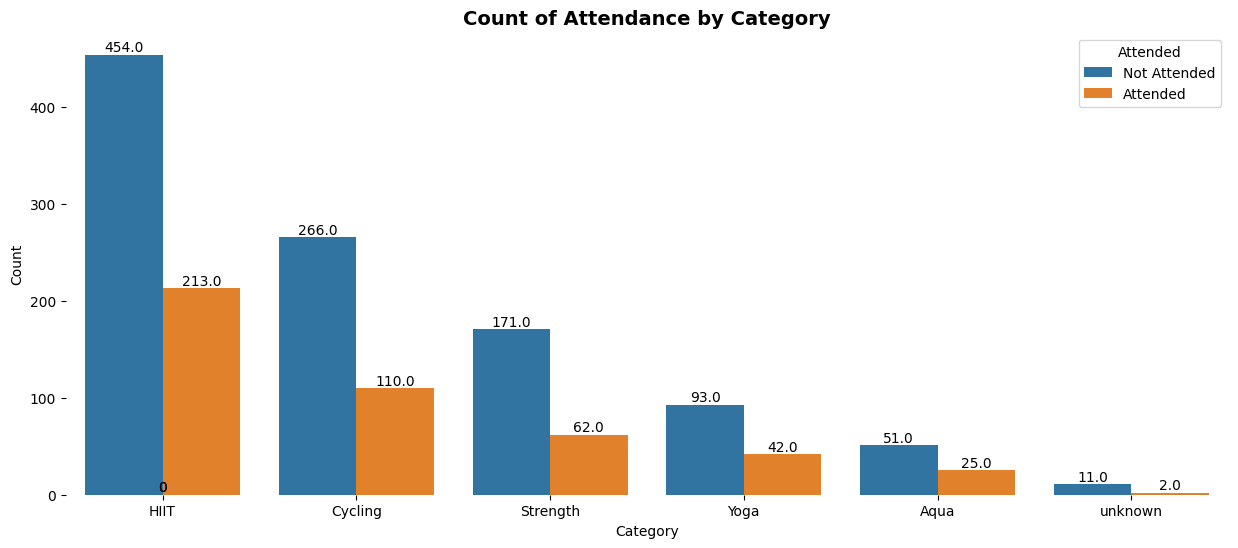

In [7]:
# Countplot for attendance by category
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df, x='category', hue='attended', order=df['category'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Attendance by Category', size=14, weight="bold")
plt.legend(title='Attended', labels=['Not Attended', 'Attended'])
sns.despine(left=True, bottom=True)
plt.show()

Check Balance of Attendance

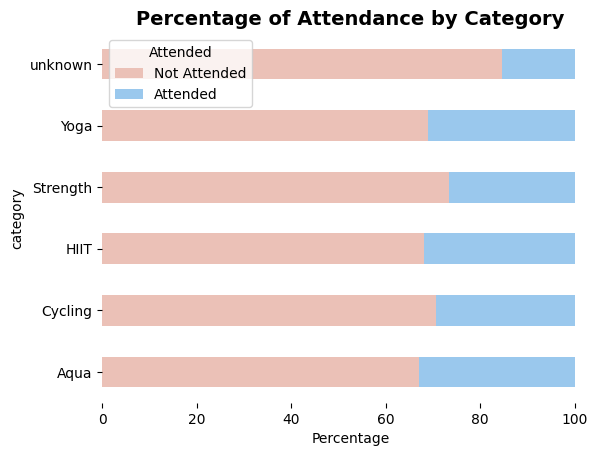

In [8]:
# Cross-tabulation of attendance by category
ct = pd.crosstab(df['category'], df['attended'], normalize='index') * 100
ct.plot(kind='barh', stacked=True, color=["#ebc1b7", "#9ac8ed"])
plt.xlabel('Percentage')
plt.title('Percentage of Attendance by Category', size=14, weight="bold")
plt.legend(title='Attended', labels=['Not Attended', 'Attended'])
sns.despine(left=True, bottom=True)
plt.show()

Distribution of Months as Member

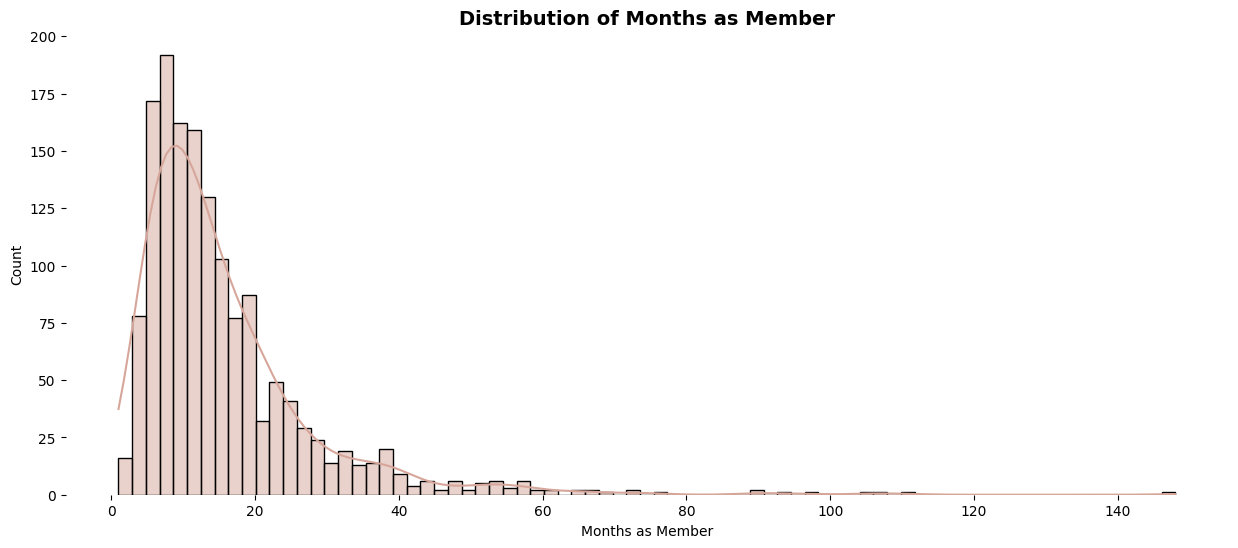

In [9]:
# Histogram of months_as_member
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='months_as_member', kde=True, color="#d6a69a")
plt.xlabel('Months as Member')
plt.title('Distribution of Months as Member', size=14, weight="bold")
sns.despine(left=True, bottom=True)
plt.show()

Relationship Between Attendance and Months as Member

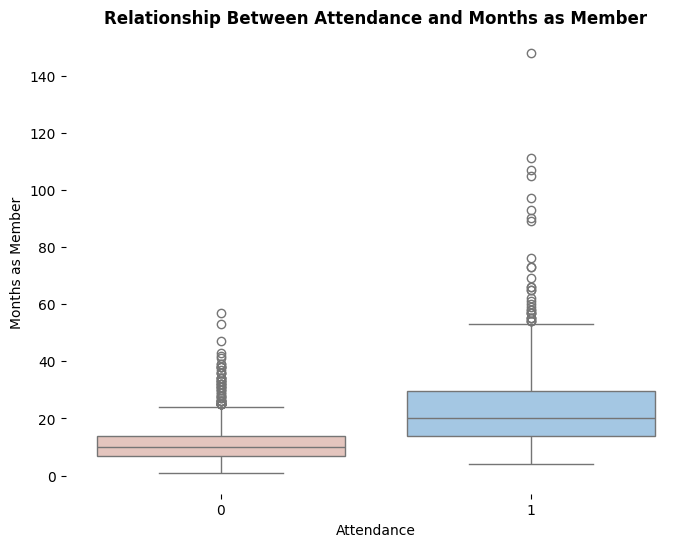

In [10]:
# Boxplot of months_as_member by attendance
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='attended', y='months_as_member', palette=["#ebc1b7", "#9ac8ed"])
plt.xlabel('Attendance')
plt.ylabel('Months as Member')
plt.title('Relationship Between Attendance and Months as Member', size=12, weight="bold")
sns.despine(left=True, bottom=True)
plt.show()

##  Machine Learning Problem Type



This is a classification problem because the target variable attended is binary (0 or 1)

Baseline Model - Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Prepare data for modeling
X = df.drop(['attended', 'booking_id'], axis=1)
X = pd.get_dummies(X, columns=['category', 'time'], drop_first=True)
y = df['attended']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_test)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Precision: 0.7692307692307693
Recall: 0.42857142857142855
F1-Score: 0.5504587155963303


 Comparison Model - Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest model
rf_clf = RandomForestClassifier(n_estimators=50, random_state=1)
rf_clf.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_clf.predict(X_test)
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))

Precision: 0.5873015873015873
Recall: 0.5285714285714286
F1-Score: 0.556390977443609


Model Performance Comparison

In [13]:
# Compare performance metrics
print("Logistic Regression Performance:")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

print("\nRandom Forest Performance:")
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))

Logistic Regression Performance:
Precision: 0.7692307692307693
Recall: 0.42857142857142855
F1-Score: 0.5504587155963303

Random Forest Performance:
Precision: 0.5873015873015873
Recall: 0.5285714285714286
F1-Score: 0.556390977443609


In [14]:
# Logistic Regression with class weights
log_reg = LogisticRegression(class_weight='balanced', random_state=1)
log_reg.fit(X_train, y_train)

# Random Forest with class weights
rf_clf = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50, random_state=1)

In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Performance (After Tuning):")
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Performance (After Tuning):
Precision: 0.5590062111801242
Recall: 0.6428571428571429
F1-Score: 0.5980066445182725


In [23]:
!pip install xgboost

In [25]:
# Create a new feature: ratio of months_as_member to days_before
df['months_to_days_ratio'] = df['months_as_member'] / df['days_before']

# Update X
X = df.drop(['attended', 'booking_id'], axis=1)
X = pd.get_dummies(X, columns=['category', 'time'], drop_first=True)

In [31]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='f1')
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())

Cross-Validation F1 Scores: [0.65979381 0.61780105 0.64921466 0.55102041 0.64039409]
Mean F1 Score: 0.6236448036144977


In [32]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('rf', rf_clf),
], voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate the model
y_pred_voting = voting_clf.predict(X_test)
print("Voting Classifier Performance:")
print("Precision:", precision_score(y_test, y_pred_voting))
print("Recall:", recall_score(y_test, y_pred_voting))
print("F1-Score:", f1_score(y_test, y_pred_voting))

Voting Classifier Performance:
Precision: 0.6028368794326241
Recall: 0.6071428571428571
F1-Score: 0.604982206405694


In [35]:
# Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Performance (After Improvements):")
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1-Score:", f1_score(y_test, y_pred_log_reg))

# Random Forest
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Performance (After Improvements):")
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))



Logistic Regression Performance (After Improvements):
Precision: 0.5900621118012422
Recall: 0.6785714285714286
F1-Score: 0.6312292358803987
Random Forest Performance (After Improvements):
Precision: 0.6166666666666667
Recall: 0.5285714285714286
F1-Score: 0.5692307692307692
